# Bài tập về nhà tuần 9:
Nhập tham số $\alpha=$ ngày sinh; $\beta=$ tháng sinh.

1) Hãy phân tích mô hình ARMA(1,1) với tham số $\phi_1=\beta\%$; $\theta_1=\alpha\%$

2) Hãy phân tích mô hình ARMA(1,1) với tham số $ \phi_1=\beta\%; \phi_2=\alpha\%; \theta_1=\alpha\%; \theta_2=\beta\%;  $


In [73]:



from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

# Assignment parameters
alpha  = 12;
beta   = 7;
# Figure size
height = 10
width  = 15

### Bài 1: ARMA(1, 1)

Tham số: $\phi_1=\beta\%$; $\theta_1=\alpha\%$

In [74]:
ar    = np.array([beta/100])
ma    = np.array([alpha/100])
Ariel = ArmaProcess.from_coeffs(ar, ma)

Phân tích mô hình ARMA(1,1) như sau 

In [75]:
print('Tinh khả nghịch:', Ariel.isinvertible)
print('Tính dừng của chuỗi thời gian:', Ariel.isstationary)
print('Đa thức phần MA:', Ariel.mapoly)
print('Nghiệm của đa thức phần MA', Ariel.maroots)
print('Đa thức phần AR:', Ariel.arpoly)
print('Nghiệm của đa thức phần MA', Ariel.arroots)
print('Các giá trị acf:', np.round(Ariel.acf(10),4)) 
print('Các giá trị acvf:', np.round(Ariel.acovf(10),4)) 
print('Chuyển ARMA thành MA', Ariel.arma2ma(10))
print('Chuyển ARMA thành AR', Ariel.arma2ar(10))

Tinh khả nghịch: True
Tính dừng của chuỗi thời gian: True
Đa thức phần MA: 1.0 + 0.12·x¹
Nghiệm của đa thức phần MA [-8.33333333]
Đa thức phần AR: 1.0 - 0.07·x¹
Nghiệm của đa thức phần MA [14.28571429]
Các giá trị acf: [1.000e+00 1.858e-01 1.300e-02 9.000e-04 1.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
Các giá trị acvf: [1.0363e+00 1.9250e-01 1.3500e-02 9.0000e-04 1.0000e-04 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
Chuyển ARMA thành MA [1.00000000e+00 1.90000000e-01 1.33000000e-02 9.31000000e-04
 6.51700000e-05 4.56190000e-06 3.19333000e-07 2.23533100e-08
 1.56473170e-09 1.09531219e-10]
Chuyển ARMA thành AR [ 1.00000000e+00 -1.90000000e-01  2.28000000e-02 -2.73600000e-03
  3.28320000e-04 -3.93984000e-05  4.72780800e-06 -5.67336960e-07
  6.80804352e-08 -8.16965222e-09]


In [76]:
ARMA_data = Ariel.generate_sample(nsample=10000)

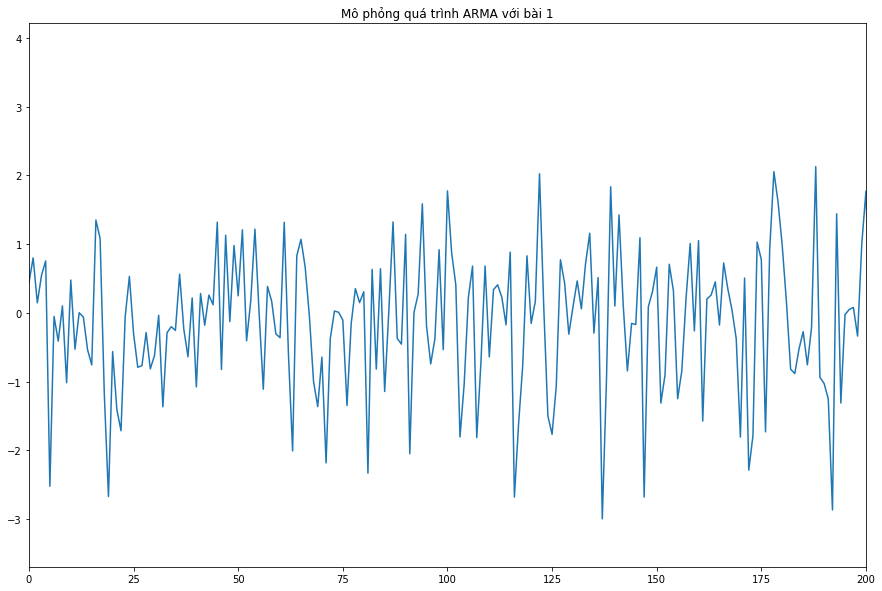

In [77]:
plt.figure(figsize=[width, height]); # Set dimensions for figure
plt.plot(ARMA_data)
plt.title("Mô phỏng quá trình ARMA với bài 1")
plt.xlim([0, 200])
plt.show()

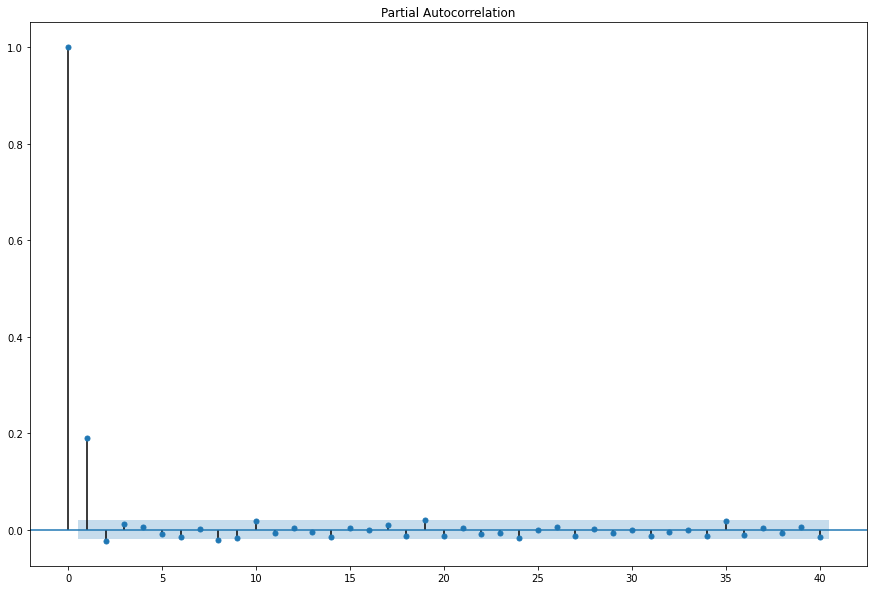

In [78]:
fig, ax = plt.subplots(figsize=(width, height))
plot_pacf(ARMA_data, ax=ax);
plt.show()

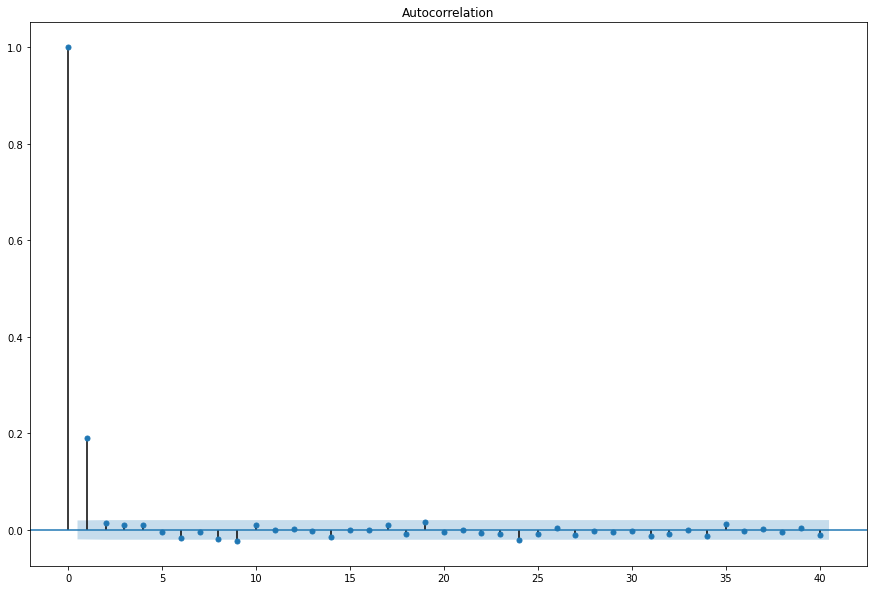

In [79]:
fig, ax = plt.subplots(figsize=(width, height))
plot_acf(ARMA_data, ax=ax);
plt.show()

### Bài 2: ARMA(2, 2)

Tham số: $ \phi_1=\beta\%; \phi_2=\alpha\%; \theta_1=\alpha\%; \theta_2=\beta\%;  $

In [80]:
ar    = np.array([beta/100, alpha/100])
ma    = np.array([alpha/100, beta/100])
Belle = ArmaProcess.from_coeffs(ar, ma)

Phân tích mô hình ARMA(1,1) như sau 

In [81]:
print('Tinh khả nghịch:', Belle.isinvertible)
print('Tính dừng của chuỗi thời gian:', Belle.isstationary)
print('Đa thức phần MA:', Belle.mapoly)
print('Nghiệm của đa thức phần MA', Belle.maroots)
print('Đa thức phần AR:', Belle.arpoly)
print('Nghiệm của đa thức phần MA', Belle.arroots)
print('Các giá trị acf:', np.round(Belle.acf(10),4)) 
print('Các giá trị acvf:', np.round(Belle.acovf(10),4)) 
print('Chuyển ARMA thành MA', Belle.arma2ma(10))
print('Chuyển ARMA thành AR', Belle.arma2ar(10))

Tinh khả nghịch: True
Tính dừng của chuỗi thời gian: True
Đa thức phần MA: 1.0 + 0.12·x¹ + 0.07·x²
Nghiệm của đa thức phần MA [-0.85714286-3.68117106j -0.85714286+3.68117106j]
Đa thức phần AR: 1.0 - 0.07·x¹ - 0.12·x²
Nghiệm của đa thức phần MA [-3.19311506  2.60978173]
Các giá trị acf: [1.000e+00 2.199e-01 2.002e-01 4.040e-02 2.690e-02 6.700e-03 3.700e-03
 1.100e-03 5.000e-04 2.000e-04]
Các giá trị acvf: [1.0796e+00 2.3740e-01 2.1620e-01 4.3600e-02 2.9000e-02 7.3000e-03
 4.0000e-03 1.2000e-03 6.0000e-04 2.0000e-04]
Chuyển ARMA thành MA [1.00000000e+00 1.90000000e-01 2.03300000e-01 3.70310000e-02
 2.69881700e-02 6.33289190e-03 3.68188283e-03 1.01767883e-03
 5.13063458e-04 1.58035901e-04]
Chuyển ARMA thành AR [ 1.00000000e+00 -1.90000000e-01 -1.67200000e-01  3.33640000e-02
  7.70032000e-03 -3.25951840e-03 -1.47880192e-04  2.45911911e-04
 -1.91578159e-05 -1.49148959e-05]


In [82]:
ARMA_data = Belle.generate_sample(nsample=10000)

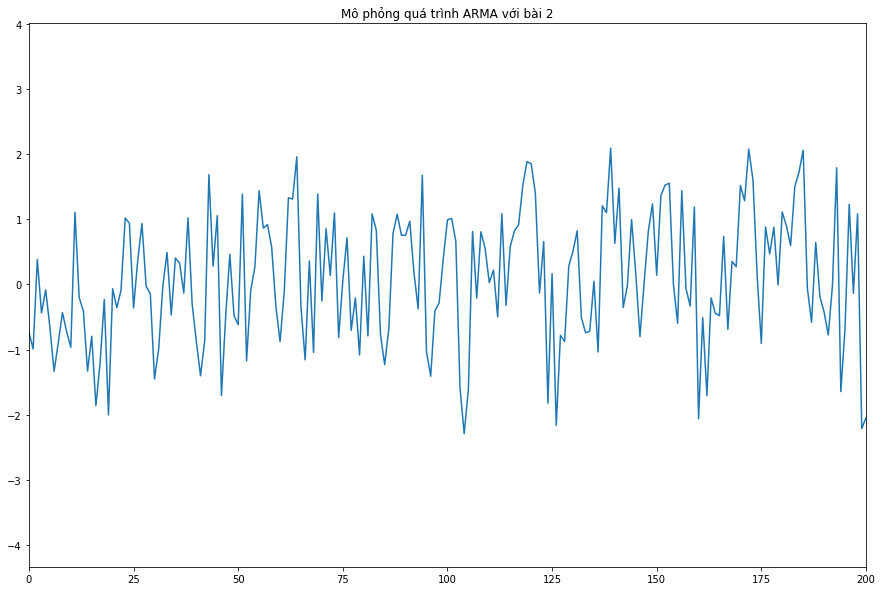

In [83]:
plt.figure(figsize=[width, height]); # Set dimensions for figure
plt.plot(ARMA_data)
plt.title("Mô phỏng quá trình ARMA với bài 2")
plt.xlim([0, 200])
plt.show()

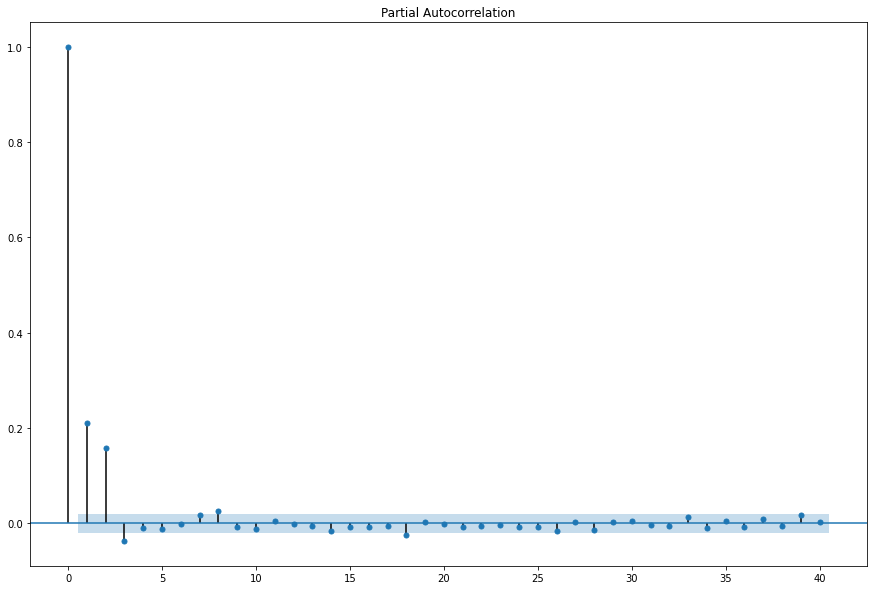

In [84]:
fig, ax = plt.subplots(figsize=(width, height))
plot_pacf(ARMA_data, ax=ax);
plt.show()

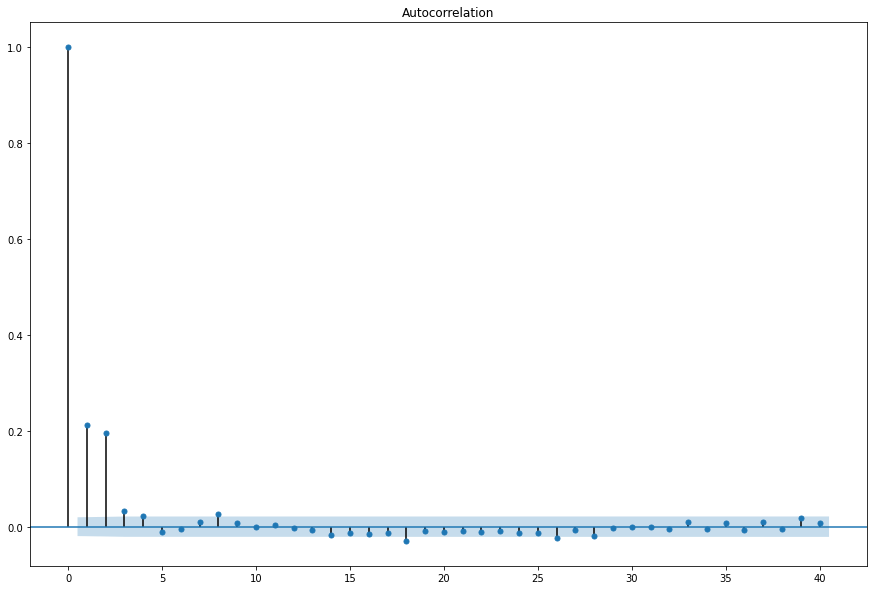

In [85]:
fig, ax = plt.subplots(figsize=(width, height))
plot_acf(ARMA_data, ax=ax);
plt.show()